##### Agnieszka Marciszewska
## Analysis of Unstracted Data
### list 4

Visit the “Publications” section of the Hugo Steinhaus Center website (http:
//prac.im.pwr.wroc.pl/~hugo/HSC/Publications.html). Scrape the data
on research papers from that site and generate a cooperation network of authors
in the following way:
1. members of HCS are the nodes,
2. the size of a node is proportional to the number of papers co-authored by
the node,
3. a link between two nodes means a paper written together by the corresponding members,
4. a weight of the link indicates the total number of common papers.

Visualize the network (with names and link weights). Detect the connected
components.

#### Dwa podejścia: <a class="anchor" id="toc"></a>
1. [Pobieramy pogrubione nazwiska ze strony z publikacjami i wybieramy unikatowe](#model1) 
2. [Pobieramy nazwiska dostępne w zakładce 'Pracownicy i studenci' jako członków i porównujemy z nazwiskami przy każdym artykule](#model2)

In [1]:
import requests
from bs4 import BeautifulSoup
import networkx as nx
import numpy as np
from itertools import combinations
from urllib.request import urlopen
from matplotlib import pyplot as plt
from unidecode import unidecode

# 1  <a class="anchor" id="model1"></a>
#### Pobieramy pogrubione nazwiska ze strony z publikacjami i wybieramy unikatowe

In [2]:
url = "http://prac.im.pwr.wroc.pl/~hugo/HSC/Publications.html"
html = urlopen(url).read()
soup = BeautifulSoup(html, features="html.parser")

bTags = [] 
#znajduje pogrubione
for i in soup.findAll('b'):
    bTags.append(i.text)


In [3]:
liTags = [] 
#znajduje list item
for i in soup.findAll('li'):
    liTags.append(i.text)

In [4]:
members = []
for name in bTags:
    name = name.replace(' ','')
    name = unidecode(name)
    if name[1] == '.':
        members.append(name)
        
members = np.unique(members)

In [5]:
members

array(['A.Chechkin', 'A.Fulinski', 'A.Grzesiek', 'A.Izydorczyk',
       'A.Janicki', 'A.Jurlewicz', 'A.Kumar', 'A.Makagon', 'A.Michalak',
       'A.Misiorek', 'A.Rejman', 'A.Stanislavsky', 'A.Weron',
       'A.Wilkowska', 'A.Wylomanska', 'B.Kozlowska', 'B.Przybylowicz',
       'B.Stawiarski', 'D.Kucharczyk', 'D.Szarek', 'E.Broszkiewicz-Suwaj',
       'E.Wojcik', 'G.Krzyzanowski', 'G.Kukla', 'G.Sikora', 'G.Zak',
       'H.Loch', 'H.Loch-Olszewska', 'H.Olszewska-Loch', 'J.Adamska',
       'J.Gajda', 'J.Goncerzewicz', 'J.Gruszka', 'J.Hebda-Sobkowicz',
       'J.Iwanik', 'J.Janczura', 'J.Nowicka', 'J.Nowicka-Zagrajek',
       'J.Obuchowski', 'J.Slezak', 'J.Sokolowski', 'J.Szwabinski',
       'J.Witulska', 'K.Burnecki', 'K.Gasior', 'K.Maraj',
       'K.Maraj-Zygmat', 'K.Podgorski', 'L.Bielak', 'L.Plociniczak',
       'M.Balcerek', 'M.Borgosz-Koczwara', 'M.Kotulski', 'M.Kozlowski',
       'M.Magdziarz', 'M.Malek', 'M.Mrozinska', 'M.Muszkieta',
       'M.Switala', 'M.Teuerle', 'P.Kokoszka', '

In [6]:
n1 = 'H.Loch-Olszewska'
index1 = np.argwhere(members == n1)
members = np.delete(members, index1)
n2 = 'H.Olszewska-Loch'
index2 = np.argwhere(members == n2)
members = np.delete(members, index2)
n3 = 'J.Nowicka-Zagrajek'
index3 = np.argwhere(members == n3)
members = np.delete(members, index3)
n4 = 'K.Maraj-Zygmat'
index4 = np.argwhere(members == n4)
members = np.delete(members, index4)

In [7]:
members

array(['A.Chechkin', 'A.Fulinski', 'A.Grzesiek', 'A.Izydorczyk',
       'A.Janicki', 'A.Jurlewicz', 'A.Kumar', 'A.Makagon', 'A.Michalak',
       'A.Misiorek', 'A.Rejman', 'A.Stanislavsky', 'A.Weron',
       'A.Wilkowska', 'A.Wylomanska', 'B.Kozlowska', 'B.Przybylowicz',
       'B.Stawiarski', 'D.Kucharczyk', 'D.Szarek', 'E.Broszkiewicz-Suwaj',
       'E.Wojcik', 'G.Krzyzanowski', 'G.Kukla', 'G.Sikora', 'G.Zak',
       'H.Loch', 'J.Adamska', 'J.Gajda', 'J.Goncerzewicz', 'J.Gruszka',
       'J.Hebda-Sobkowicz', 'J.Iwanik', 'J.Janczura', 'J.Nowicka',
       'J.Obuchowski', 'J.Slezak', 'J.Sokolowski', 'J.Szwabinski',
       'J.Witulska', 'K.Burnecki', 'K.Gasior', 'K.Maraj', 'K.Podgorski',
       'L.Bielak', 'L.Plociniczak', 'M.Balcerek', 'M.Borgosz-Koczwara',
       'M.Kotulski', 'M.Kozlowski', 'M.Magdziarz', 'M.Malek',
       'M.Mrozinska', 'M.Muszkieta', 'M.Switala', 'M.Teuerle',
       'P.Kokoszka', 'P.Kowalek', 'P.Kruczek', 'P.Mista', 'P.Sztuba',
       'P.Wilman', 'R.Poloczanski', 'R.

In [8]:
lines = []
for line in liTags:
    line = line.replace('\n','')
    line = unidecode(line)
    line = line.replace(' ','')
    lines.append(line)

In [9]:
lines

['J.Szwabinski,A.Weron(2022)"RecentAdvancesinSingle-ParticleTracking:ExperimentandAnalysis",\rMDPI.\r',
 'F.Chaari,J.Leskow,A.Wylomanska,R.Zimroz,A.Napolitano(2021)"AppliedConditionMonitoring.NonstationarySystems:TheoryandApplications",\rSpringerInternationalPublishing.\r',
 'F.Chaari,J.Leskow,R.Zimroz,A.Wylomanska,A.Dudek(2020)"AppliedConditionMonitoring.Cyclostationarity:TheoryandMethods-IV",\rSpringerInternationalPublishing.\r',
 'F.Chaari,J.Leskow,A.Napolitano,R.Zimroz,A.Wylomanska(2017)"AppliedConditionMonitoring.Cyclostationarity:TheoryandMethods-III",\rSpringerInternationalPublishing.\r',
 'R.G.Burns,I.Szymaniec,A.Weron(2016)"HugoSteinhausMathematicianforAllSeasons.RecollectionsandNotesVol.2(1945-1968)",\rBirkhauser.\r',
 'R.G.Burns,I.Szymaniec,A.Weron(2015)"HugoSteinhausMathematicianforAllSeasons.RecollectionsandNotesVol.1(1887-1945)",\rBirkhauser.\r',
 'F.Chaari,J.Leskow,A.Napolitano,R.Zimroz,A.Wylomanska,A.Dudek(2015)"AppliedConditionMonitoring.Cyclostationarity:TheoryandMeth

In [10]:
article_authors = []
for line in lines:
    co_author = []
    for name in members:
        if name in line:
            co_author.append(name)
    article_authors.append(co_author)
article_authors

[['A.Weron', 'J.Szwabinski'],
 ['A.Wylomanska'],
 ['A.Wylomanska'],
 ['A.Wylomanska'],
 ['A.Weron'],
 ['A.Weron'],
 ['A.Wylomanska'],
 ['K.Burnecki'],
 ['R.Weron'],
 ['R.Weron'],
 ['R.Weron'],
 ['A.Izydorczyk', 'A.Janicki'],
 ['A.Weron', 'R.Weron'],
 ['A.Weron', 'R.Weron'],
 ['A.Janicki'],
 ['A.Janicki', 'A.Weron'],
 ['A.Wylomanska', 'P.Kruczek'],
 ['G.Krzyzanowski', 'L.Plociniczak', 'M.Magdziarz'],
 ['J.Slezak', 'L.Plociniczak', 'M.Switala'],
 ['A.Grzesiek', 'A.Wylomanska', 'M.Teuerle'],
 ['A.Wylomanska'],
 ['J.Janczura', 'J.Szwabinski'],
 ['A.Wylomanska', 'G.Zak'],
 ['K.Burnecki'],
 ['A.Wylomanska', 'D.Kucharczyk'],
 ['J.Slezak', 'M.Magdziarz'],
 ['K.Burnecki', 'M.Balcerek'],
 ['M.Magdziarz', 'T.Zorawik'],
 ['A.Wylomanska', 'R.Poloczanski'],
 ['G.Sikora', 'K.Burnecki'],
 ['S.Orzel', 'W.Mydlarczyk'],
 ['J.Gajda', 'M.Magdziarz'],
 ['L.Plociniczak', 'W.Okrasinski'],
 ['A.Jurlewicz', 'M.Teuerle'],
 ['J.Janczura', 'R.Weron'],
 ['A.Jurlewicz', 'E.Broszkiewicz-Suwaj'],
 ['A.Weron', 'M.Magdz

In [11]:
#od tego momentu zaczynaja sie artykuły
for i in range(len(liTags)):  
    l = 'W.Żuławiński, K.Maraj-Zygmąt, H.Shiri, R.Zimroz, A.Wyłomańska (2023)'
    if l in liTags[i]:
        print(i)

49


In [12]:
article_authors = article_authors[49:]

In [13]:
# lista kto z kim robił, pary
pairs = []
for i in range(len(article_authors)):
    a = article_authors[i]
    pairs =  pairs + list(combinations(a, 2))

In [14]:
pairs

[('A.Wylomanska', 'K.Maraj'),
 ('A.Wylomanska', 'W.Zulawinski'),
 ('K.Maraj', 'W.Zulawinski'),
 ('A.Wylomanska', 'J.Adamska'),
 ('A.Wylomanska', 'J.Janczura'),
 ('A.Wylomanska', 'L.Bielak'),
 ('J.Adamska', 'J.Janczura'),
 ('J.Adamska', 'L.Bielak'),
 ('J.Janczura', 'L.Bielak'),
 ('A.Chechkin', 'A.Wylomanska'),
 ('A.Chechkin', 'K.Burnecki'),
 ('A.Chechkin', 'M.Balcerek'),
 ('A.Wylomanska', 'K.Burnecki'),
 ('A.Wylomanska', 'M.Balcerek'),
 ('K.Burnecki', 'M.Balcerek'),
 ('A.Wilkowska', 'K.Burnecki'),
 ('A.Wilkowska', 'M.Teuerle'),
 ('K.Burnecki', 'M.Teuerle'),
 ('A.Grzesiek', 'A.Wylomanska'),
 ('A.Grzesiek', 'W.Zulawinski'),
 ('A.Wylomanska', 'W.Zulawinski'),
 ('A.Grzesiek', 'A.Wylomanska'),
 ('A.Grzesiek', 'M.Mrozinska'),
 ('A.Wylomanska', 'M.Mrozinska'),
 ('A.Wylomanska', 'J.Hebda-Sobkowicz'),
 ('E.Wojcik', 'J.Janczura'),
 ('H.Loch', 'J.Szwabinski'),
 ('H.Loch', 'P.Kowalek'),
 ('J.Szwabinski', 'P.Kowalek'),
 ('A.Wylomanska', 'D.Szarek'),
 ('A.Wylomanska', 'D.Szarek'),
 ('A.Wylomanska', '

In [15]:
G = nx.Graph()
G.add_edges_from(pairs,weight=0,size=0)

In [16]:
#ile kto z kim napisał
for edge in pairs:
    edge_weight = G[edge[0]][edge[1]]['weight']
    G[edge[0]][edge[1]]['weight'] = edge_weight + 1

In [37]:
def number_of_co_paper(G,article_authors):
    node_size = []
    node_name = list(G.nodes())
    for name in node_name:
        i = 0
        for article in range(len(article_authors)):
            if name in article_authors[article]:
                i = i+1
        node_size.append(i)
    return node_size


In [38]:
node_size = number_of_co_paper(G,article_authors)
number_of_co_dict = dict(zip(list(G.nodes()), node_size))
number_of_co_dict

{'A.Wylomanska': 176,
 'K.Maraj': 6,
 'W.Zulawinski': 5,
 'J.Adamska': 1,
 'J.Janczura': 34,
 'L.Bielak': 6,
 'A.Chechkin': 7,
 'K.Burnecki': 92,
 'M.Balcerek': 11,
 'A.Wilkowska': 4,
 'M.Teuerle': 24,
 'A.Grzesiek': 19,
 'M.Mrozinska': 1,
 'J.Hebda-Sobkowicz': 9,
 'E.Wojcik': 1,
 'H.Loch': 10,
 'J.Szwabinski': 15,
 'P.Kowalek': 4,
 'D.Szarek': 8,
 'G.Sikora': 35,
 'T.Weron': 3,
 'P.Kruczek': 13,
 'J.Witulska': 1,
 'J.Gruszka': 2,
 'A.Michalak': 13,
 'K.Gasior': 2,
 'A.Kumar': 10,
 'R.Poloczanski': 6,
 'A.Stanislavsky': 17,
 'A.Weron': 105,
 'M.Muszkieta': 6,
 'G.Krzyzanowski': 3,
 'M.Magdziarz': 69,
 'L.Plociniczak': 20,
 'J.Gajda': 28,
 'M.Malek': 1,
 'W.Nitka': 2,
 'Z.Palmowski': 27,
 'J.Obuchowski': 20,
 'T.Zorawik': 8,
 'P.Mista': 7,
 'J.Slezak': 8,
 'G.Zak': 10,
 'D.Kucharczyk': 2,
 'J.Sokolowski': 3,
 'W.Okrasinski': 9,
 'R.Weron': 99,
 'A.Jurlewicz': 36,
 'S.Orzel': 7,
 'W.Mydlarczyk': 1,
 'A.Misiorek': 17,
 'G.Kukla': 6,
 'M.Borgosz-Koczwara': 11,
 'E.Broszkiewicz-Suwaj': 11,


In [39]:
node_size2 = np.array(node_size)*10 # to tak tylko żeby kropki były większe

In [40]:
wagi = nx.get_edge_attributes(G, "weight")

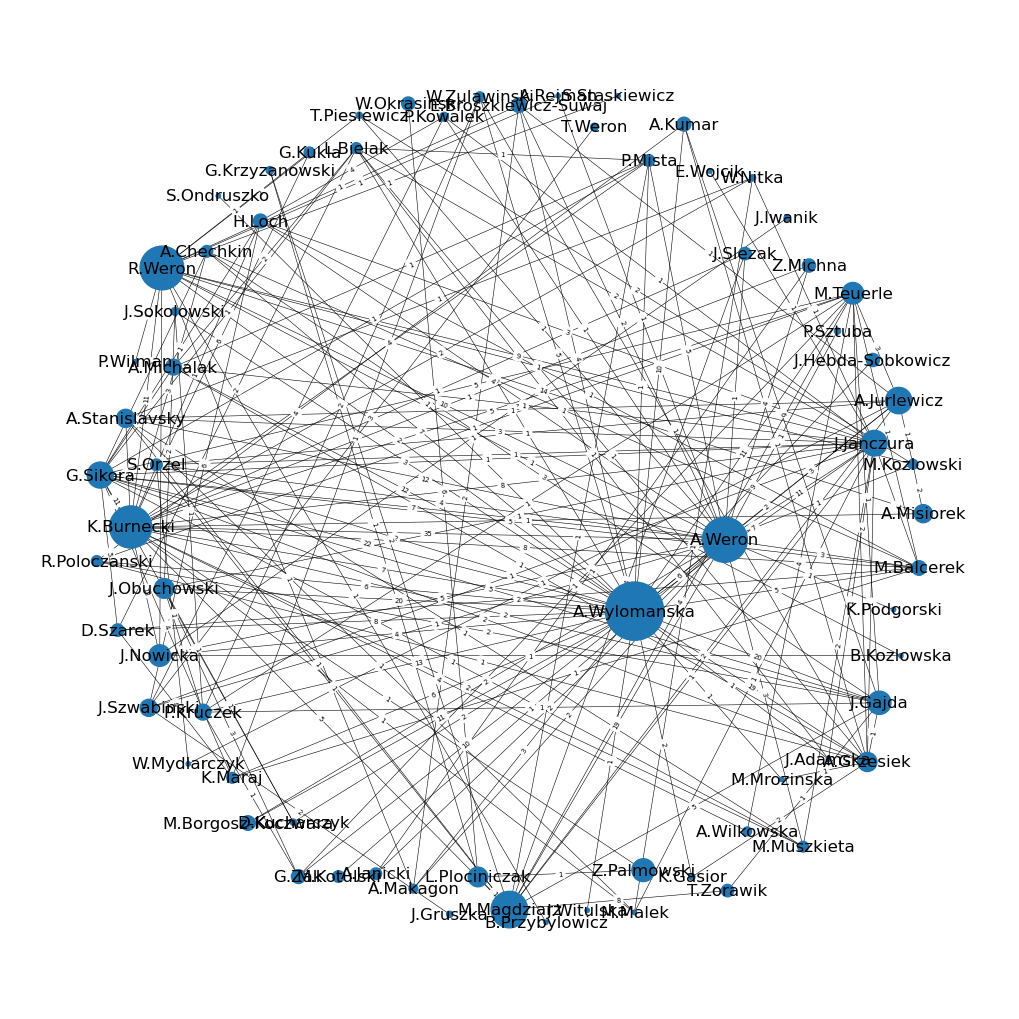

In [41]:
plt.rcParams["figure.figsize"] = [10, 10]
pos = nx.spring_layout(G, k=7)
nx.draw(G,pos,node_size=node_size2,with_labels=True,width=0.4)
nx.draw_networkx_edge_labels(G, pos,
                              wagi,
                              label_pos=0.5,
                              font_size = 5
                              )
plt.show()

# 2 <a class="anchor" id="model2"></a>
#### Pobieramy nazwiska dostępne w zakładce 'Pracownicy i studenci' jako członków i porównujemy z nazwiskami przy każdym artykule

In [42]:
url2 = "http://prac.im.pwr.wroc.pl/~hugo/HSC/People.htm"
html2 = urlopen(url2).read()
soup2 = BeautifulSoup(html2, features="html.parser")

bTags2 = [] 
#znajduje pogrubione
for i in soup2.findAll('b'):
    bTags2.append(i.text)

In [43]:
dtTags = [] 
#znajduje list item
for i in soup2.findAll('dt'):
    
    dtTags.append(i.text)

In [44]:
znaki = ['dr','prof.','hab.','inż.','mgr','uczelni','\n']
members2 = []
for i in dtTags:
    
    i = i.replace('\n','')
    i = " ".join(i.split())
    str1 = i.split(" ")
    str2 = [x for x in str1 if x not in znaki] #usuwam tytuły sprzed imion
    if len(str2)>1:
        name = str2[0]
        surname = str2[1]
        if surname[-3:] == 'mgr':
            surname = surname[:-3]
        if len(surname)<3: #to jeśli ktos ma drugie imie
            surname = str2[2]
        name_surname = name[0]+'.'+surname
        name_surname = name_surname.replace(',','')
        members2.append(unidecode(name_surname))

In [45]:
members2 = list(np.unique(members2))

In [46]:
members2

['A.Borzi',
 'A.Chechkin',
 'A.Grzesiek',
 'A.Jurlewicz',
 'A.Makagon',
 'A.Misiorek',
 'A.Stanislavsky',
 'A.Weron',
 'A.Wilkowska',
 'A.Wylomanska',
 'C.Manzo',
 'D.Krapf',
 'D.Kucharczyk',
 'E.Barkai',
 'E.Broszkiewicz-Suwaj',
 'G.Kukla',
 'G.Sikora',
 'H.Loch-Olszewska',
 'J.Al-Hadad',
 'J.Gajda',
 'J.Goncerzewicz',
 'J.Gruszka',
 'J.Hebda-Sobkowicz',
 'J.Janczura',
 'J.Nowicka-Zagrajek',
 'J.Rosinski',
 'J.Sieber',
 'J.Slezak',
 'J.Szwabinski',
 'K.Burnecki',
 'K.Maraj-Zygmat',
 'L.Bielak',
 'L.Plociniczak',
 'M.Balcerek',
 'M.Donno',
 'M.Kozlowski',
 'M.Lachowicz',
 'M.Magdziarz',
 'M.Musiela',
 'M.Muszkieta',
 'M.Switala',
 'M.Teuerle',
 'O.Boxma',
 'P.Kowalczyk',
 'P.Kowalek',
 'P.Kruczek',
 'P.Mista',
 'P.Zebrowski',
 'R.Iwankiewicz',
 'R.Metzler',
 'R.Poloczanski',
 'R.Rudnicki',
 'R.Weron',
 'R.Zimroz',
 'S.Mercik',
 'T.Piesiewicz',
 'T.Weron',
 'T.Zorawik',
 'W.Zulawinski',
 'Z.Michna',
 'Z.Palmowski',
 'Z.Suchanecki']

In [47]:
article_authors2 = []
for line in lines:
    co_author = []
    for name in members2:
        if name in line:
            co_author.append(name)
    article_authors2.append(co_author)

In [48]:
article_authors2 = article_authors2[49:]

In [49]:
# lista kto z kim robił, pary
pairs2 = []
for i in range(len(article_authors2)):
    a = article_authors2[i]
    pairs2 =  pairs2 + list(combinations(a, 2))

In [50]:
pairs2

[('A.Wylomanska', 'K.Maraj-Zygmat'),
 ('A.Wylomanska', 'R.Zimroz'),
 ('A.Wylomanska', 'W.Zulawinski'),
 ('K.Maraj-Zygmat', 'R.Zimroz'),
 ('K.Maraj-Zygmat', 'W.Zulawinski'),
 ('R.Zimroz', 'W.Zulawinski'),
 ('A.Wylomanska', 'J.Janczura'),
 ('A.Wylomanska', 'L.Bielak'),
 ('J.Janczura', 'L.Bielak'),
 ('A.Chechkin', 'A.Wylomanska'),
 ('A.Chechkin', 'K.Burnecki'),
 ('A.Chechkin', 'M.Balcerek'),
 ('A.Wylomanska', 'K.Burnecki'),
 ('A.Wylomanska', 'M.Balcerek'),
 ('K.Burnecki', 'M.Balcerek'),
 ('A.Wilkowska', 'K.Burnecki'),
 ('A.Wilkowska', 'M.Teuerle'),
 ('K.Burnecki', 'M.Teuerle'),
 ('A.Grzesiek', 'A.Wylomanska'),
 ('A.Grzesiek', 'W.Zulawinski'),
 ('A.Wylomanska', 'W.Zulawinski'),
 ('A.Grzesiek', 'A.Wylomanska'),
 ('A.Wylomanska', 'J.Hebda-Sobkowicz'),
 ('A.Wylomanska', 'R.Zimroz'),
 ('J.Hebda-Sobkowicz', 'R.Zimroz'),
 ('H.Loch-Olszewska', 'J.Szwabinski'),
 ('H.Loch-Olszewska', 'P.Kowalek'),
 ('J.Szwabinski', 'P.Kowalek'),
 ('A.Wylomanska', 'R.Zimroz'),
 ('A.Wylomanska', 'D.Krapf'),
 ('A.Wylo

In [51]:
G2 = nx.Graph()
G2.add_edges_from(pairs2,weight=0,size=0)

In [52]:
#ile kto z kim napisał
for edge in pairs2:
    edge_weight = G2[edge[0]][edge[1]]['weight']
    G2[edge[0]][edge[1]]['weight'] = edge_weight + 1

In [53]:
node_size2 = number_of_co_paper(G2,article_authors2)
number_of_co_dict2 = dict(zip(list(G2.nodes()), node_size2))
number_of_co_dict2

{'A.Wylomanska': 176,
 'K.Maraj-Zygmat': 2,
 'R.Zimroz': 59,
 'W.Zulawinski': 5,
 'J.Janczura': 34,
 'L.Bielak': 6,
 'A.Chechkin': 7,
 'K.Burnecki': 92,
 'M.Balcerek': 11,
 'A.Wilkowska': 4,
 'M.Teuerle': 24,
 'A.Grzesiek': 19,
 'J.Hebda-Sobkowicz': 9,
 'H.Loch-Olszewska': 9,
 'J.Szwabinski': 15,
 'P.Kowalek': 4,
 'D.Krapf': 9,
 'G.Sikora': 35,
 'T.Weron': 3,
 'P.Kruczek': 13,
 'J.Gruszka': 2,
 'R.Poloczanski': 6,
 'A.Stanislavsky': 17,
 'A.Weron': 105,
 'M.Muszkieta': 6,
 'C.Manzo': 2,
 'R.Metzler': 8,
 'L.Plociniczak': 20,
 'M.Magdziarz': 69,
 'J.Gajda': 28,
 'Z.Palmowski': 27,
 'T.Zorawik': 8,
 'P.Mista': 7,
 'J.Slezak': 8,
 'D.Kucharczyk': 2,
 'A.Borzi': 1,
 'P.Zebrowski': 9,
 'R.Weron': 99,
 'A.Misiorek': 17,
 'G.Kukla': 6,
 'A.Jurlewicz': 36,
 'E.Broszkiewicz-Suwaj': 11,
 'J.Nowicka-Zagrajek': 21,
 'A.Makagon': 4,
 'Z.Michna': 9,
 'M.Kozlowski': 5,
 'T.Piesiewicz': 2,
 'J.Rosinski': 1}

In [54]:
node_size22 = np.array(node_size2)*10 # to tak tylko żeby kropki były większe

In [55]:
wagi2 = nx.get_edge_attributes(G2, "weight")

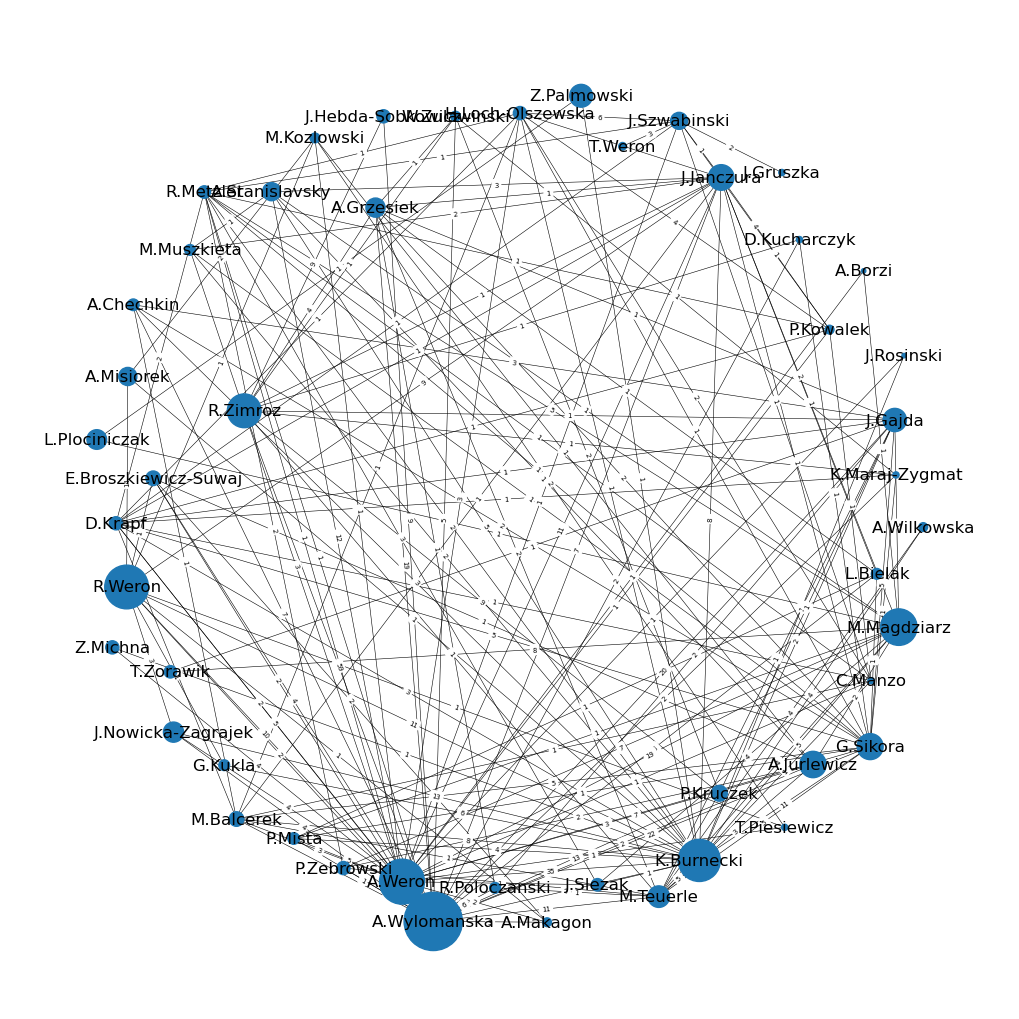

In [56]:
plt.rcParams["figure.figsize"] = [10, 10]
pos = nx.spring_layout(G2, k=7)
nx.draw(G2,pos,node_size=node_size22,with_labels=True,width=0.4)
nx.draw_networkx_edge_labels(G2, pos,
                              wagi2,
                              label_pos=0.5,
                              font_size = 5
                              )
plt.show()